<a href="https://colab.research.google.com/github/rbzkaf/Multi_Armed_Bandit_Algorithms/blob/master/viz_algos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Visualizing Cumulative Rewards

In [1]:
import matplotlib.pyplot as plt
import pandas as pd



In [8]:
df = pd.read_csv("Epsilon_Greedy_1_sim_10000_pulls")

# Rewards = [0.2,0.2,0.2,0.2,0.4]

#E-Greedy

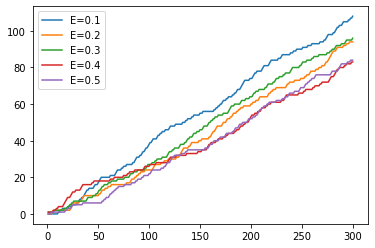

In [12]:
eps = df.Epsilon.unique()
gk = df.groupby("Epsilon")

for ep in eps:
    data = gk.get_group(ep)
    data = data[:300]
    label = "E="+str(float(ep))
    plt.plot(data["Pull_no"], data["Cumul_Reward"], label=label)


plt.legend()
plt.show()

Observation: High Epsilon performs well at the beginning but once they figure out best arm, lower epsilon exploits better

In [14]:
df = pd.read_csv("UCB_1_sim_1000_pulls")

#UCB

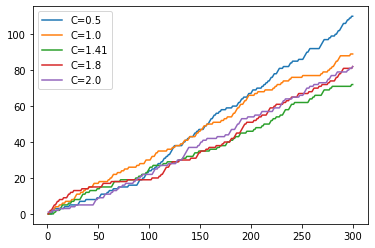

In [18]:


eps = df.Confidence.unique()
gk = df.groupby("Confidence")

for ep in eps:
    data = gk.get_group(ep)
    data = data[:300]
    label = "C="+str(float(ep))
    plt.plot(data["Pull_no"], data["Cumul_Reward"], label=label)


plt.legend()
plt.show()